In [1]:
!pip install dcor

In [2]:
from scipy import stats
import matplotlib.pyplot as plt

# import to read png as matrix

import numpy as np
# read image with nunpy


In [3]:
images  = []

for i in range (1, 25):
    img_path = f'./img/{i}.png'
    img = plt.imread(img_path)
    images.append(img)

# sort iamges by shape
images.sort(key=lambda x: x.shape)

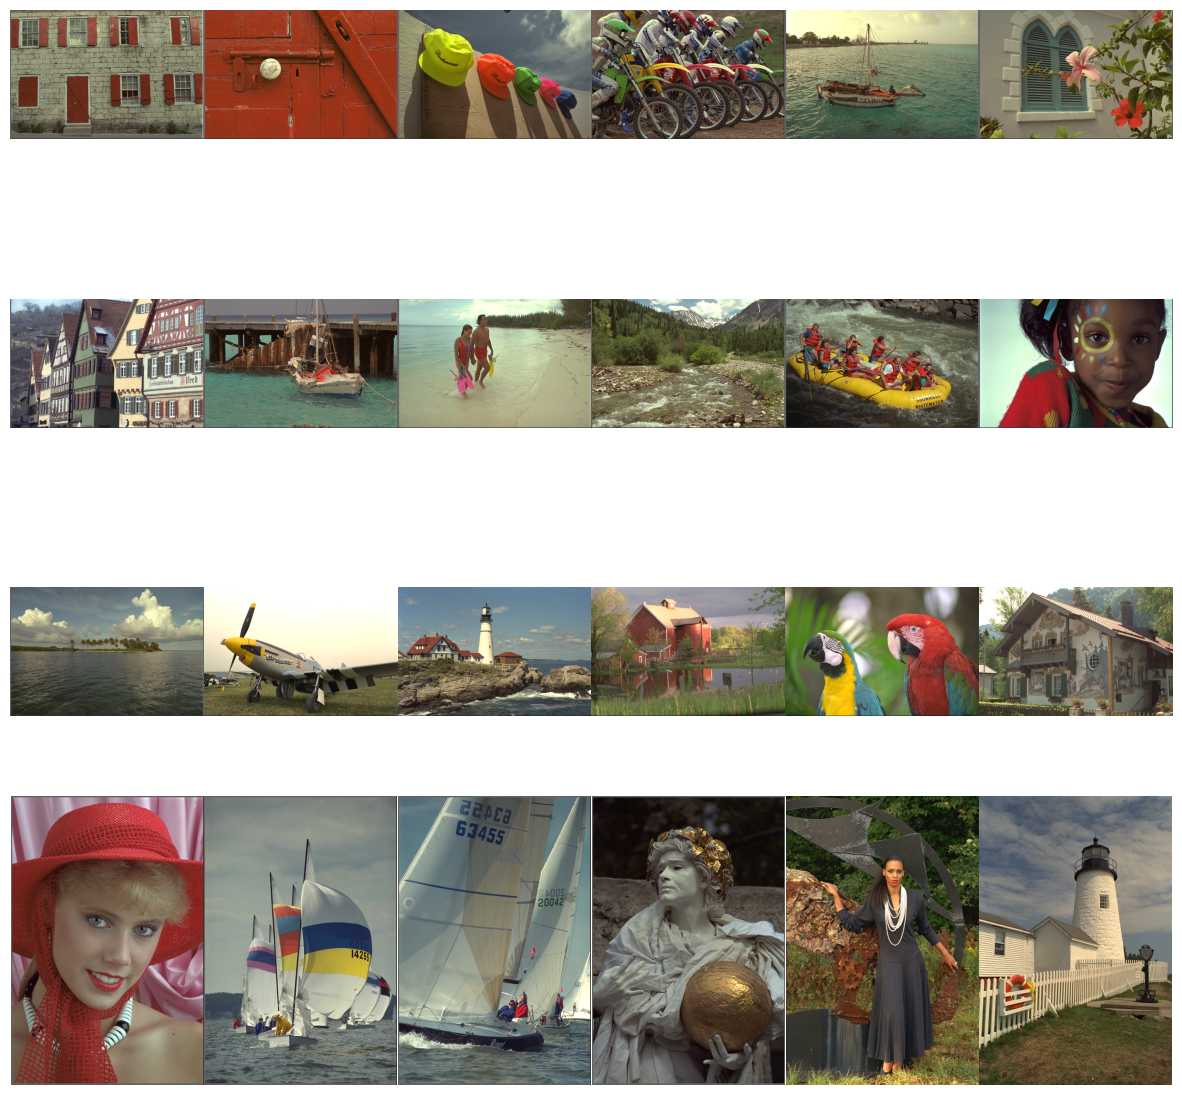

In [4]:

# plot all images together


fig, axs = plt.subplots(4, 6, figsize=(15, 15), gridspec_kw = {'wspace':0, 'hspace':0})
axs = axs.flatten()
for img, ax in zip(images, axs):
    ax.imshow(img)
    ax.axis('off')
    ax.set_aspect('equal')


# remove space between images
# fig.subplots_adjust(wspace=0, hspace=0)
#remove  vertical espace between subplots rows

plt.savefig('all_images.png', bbox_inches='tight', pad_inches=0)


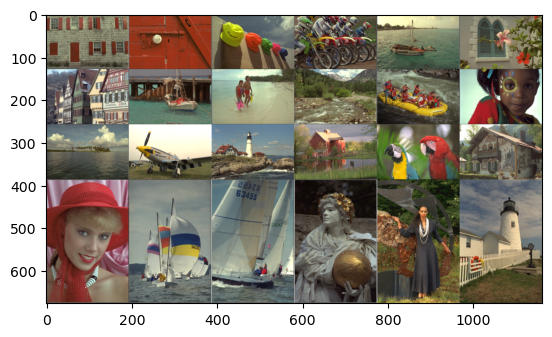

In [5]:
img_path = './all_images_grid.png'
img = plt.imread(img_path)
plt.imshow(img)

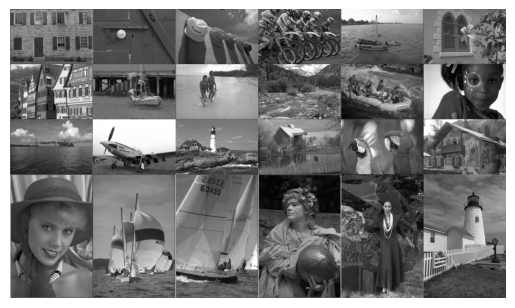

In [6]:
bw_img = 0.299*img[:,:,0] + 0.587*img[:,:,1] + 0.114*img[:,:,2]
plt.imshow(bw_img, cmap='gray')
# remove axis
plt.axis('off')
# remove white border
plt.savefig('all_images_grid_bw.png', bbox_inches='tight', pad_inches=0)

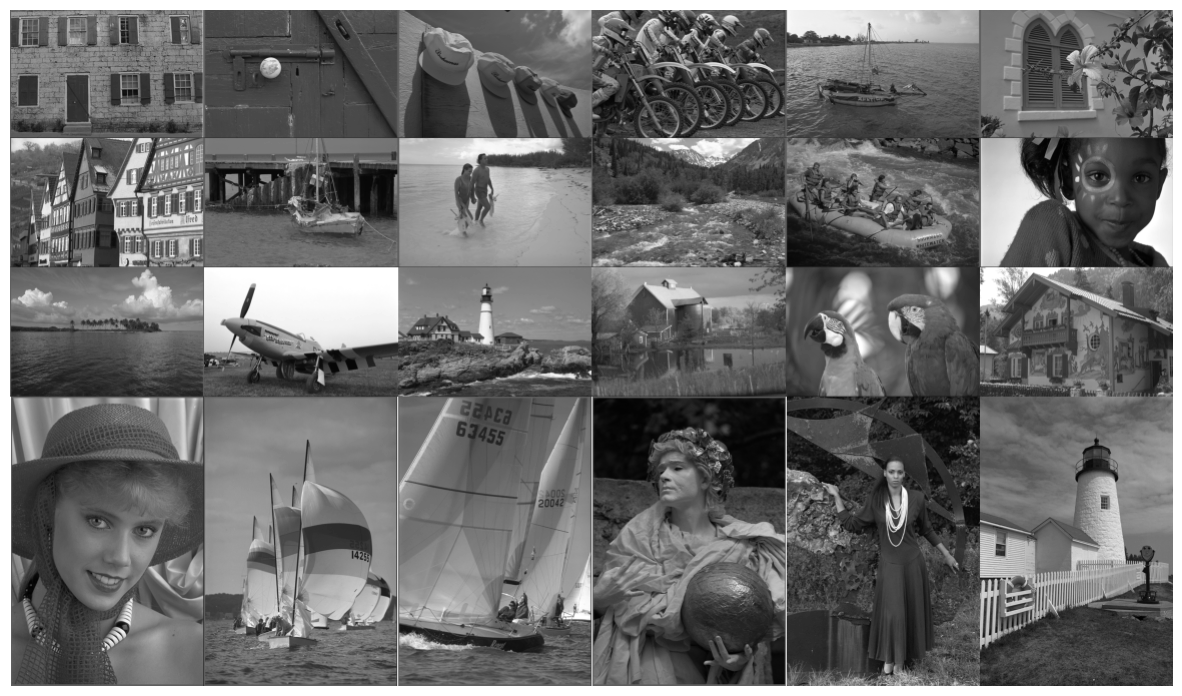

In [7]:
bw_img_mean = img[:,:,0]/3 + img[:,:,1]/3 + img[:,:,2]/3
fig, ax = plt.subplots(figsize=(15, 15))
ax.imshow(bw_img_mean, cmap='gray')
plt.axis('off')
plt.show()

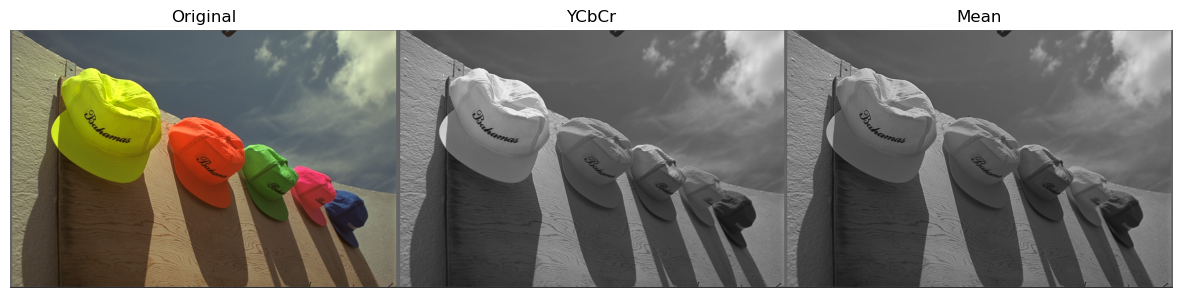

In [8]:
img_ex = images[2]
img_ex_bw = 0.299*img_ex[:,:,0] + 0.587*img_ex[:,:,1] + 0.114*img_ex[:,:,2]
img_ex_bw_mean = img_ex[:,:,0]/3 + img_ex[:,:,1]/3 + img_ex[:,:,2]/3

fig, axs = plt.subplots(1, 3, figsize=(15, 15))
axs = axs.flatten()
axs[0].imshow(img_ex)
axs[0].set_title('Original')
axs[0].axis('off')
axs[1].imshow(img_ex_bw, cmap='gray')
axs[1].set_title('YCbCr')
axs[1].axis('off')
axs[2].imshow(img_ex_bw_mean, cmap='gray')
axs[2].set_title('Mean')
axs[2].axis('off')

# remove space between images
fig.subplots_adjust(wspace=0, hspace=0)

plt.savefig('img_ex_bw.png', bbox_inches='tight', pad_inches=0)


In [9]:
images  = []

for i in range (1, 25):
    img_path = f'./img/{i}.png'
    img = plt.imread(img_path)
    images.append(img)

In [10]:
def get_bw_noise (img):
    bw_img = 0.299*img[:,:,0] + 0.587*img[:,:,1] + 0.114*img[:,:,2]

    noise = np.random.normal(0, 0.1, bw_img.shape)
    bw_img_low_noise = bw_img + noise

    mid_noise = np.random.normal(0, 0.3, bw_img.shape)
    bw_img_mid_noise = bw_img + mid_noise

    high_noise = np.random.normal(0, 0.5, bw_img.shape)
    bw_img_high_noise = bw_img + high_noise
    return  bw_img, bw_img_low_noise, bw_img_mid_noise, bw_img_high_noise

def get_bw_noise_uniform(img): 
    bw_img = 0.299*img[:,:,0] + 0.587*img[:,:,1] + 0.114*img[:,:,2]

    # use unform noise
    noise = np.random.uniform(0, 0.3, bw_img.shape)
    bw_img_noise = bw_img + noise

    mid_noise = np.random.uniform(0, 0.6, bw_img.shape)
    bw_img_mid_noise = bw_img + mid_noise

    high_noise = np.random.uniform(0, 0.8, bw_img.shape)
    bw_img_high_noise = bw_img + high_noise
    return  bw_img, bw_img_noise, bw_img_mid_noise, bw_img_high_noise

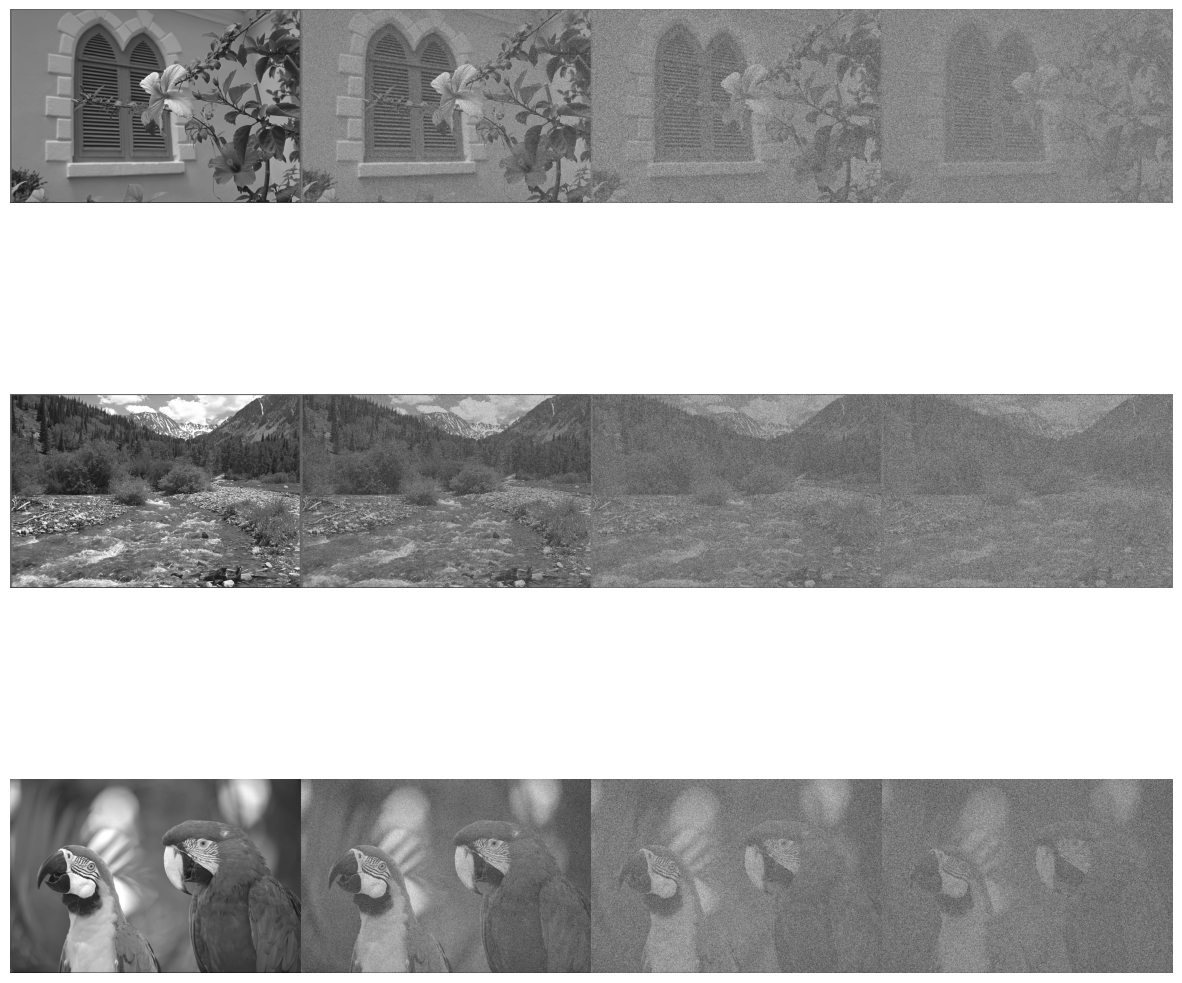

In [11]:
img_6 = images[6]
img_12 = images[12]
img_22 = images[22]

img_6_bw, img_6_noise, img_6_noise_mid ,  img_6_noise_high = get_bw_noise(img_6)
img_12_bw, img_12_noise, img_12_noise_mid, img_12_noise_high = get_bw_noise(img_12)
img_22_bw, img_22_noise, img_22_noise_mid, img_22_noise_high = get_bw_noise(img_22)

all_img_noise = [img_6_bw, img_6_noise, img_6_noise_mid ,  img_6_noise_high,
                    img_12_bw, img_12_noise, img_12_noise_mid, img_12_noise_high,
                    img_22_bw, img_22_noise, img_22_noise_mid, img_22_noise_high]

fig, axs = plt.subplots(3, 4, figsize=(15, 15))
axs = axs.flatten()

# plot bw and images with noise

for img, ax in zip(all_img_noise, axs):
    ax.imshow(img, cmap='gray')
    ax.axis('off')
    ax.set_aspect('equal')

# remove space between images
fig.subplots_adjust(wspace=0, hspace=0)

plt.show()

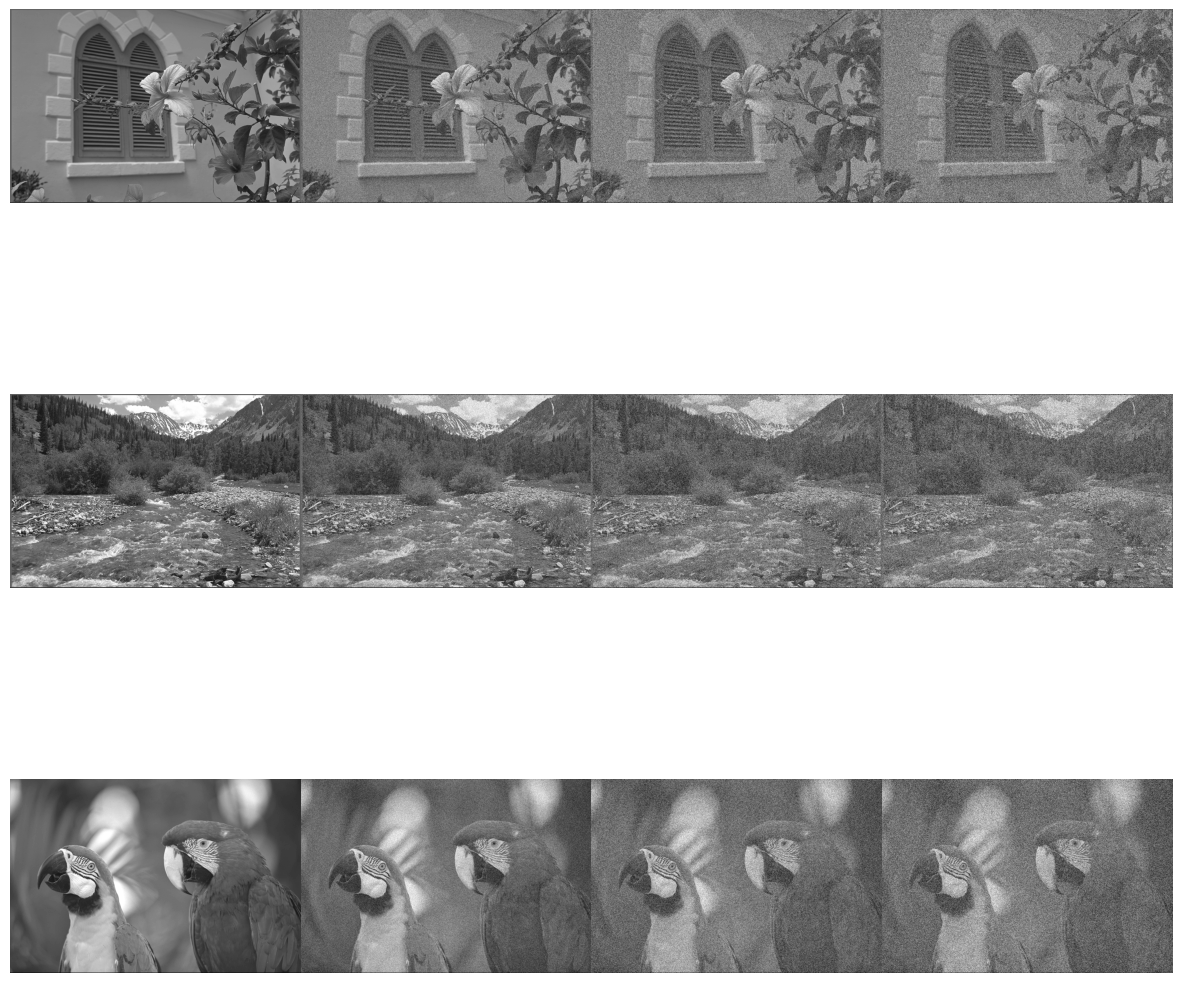

In [12]:
img_6 = images[6]
img_12 = images[12]
img_22 = images[22]

img_6_bw, img_6_noise, img_6_noise_mid ,  img_6_noise_high = get_bw_noise_uniform(img_6)
img_12_bw, img_12_noise, img_12_noise_mid, img_12_noise_high = get_bw_noise_uniform(img_12)
img_22_bw, img_22_noise, img_22_noise_mid, img_22_noise_high = get_bw_noise_uniform(img_22)

all_img_noise = [img_6_bw, img_6_noise, img_6_noise_mid ,  img_6_noise_high,
                    img_12_bw, img_12_noise, img_12_noise_mid, img_12_noise_high,
                    img_22_bw, img_22_noise, img_22_noise_mid, img_22_noise_high]

fig, axs = plt.subplots(3, 4, figsize=(15, 15))
axs = axs.flatten()

# plot bw and images with noise

for img, ax in zip(all_img_noise, axs):
    ax.imshow(img, cmap='gray')
    ax.axis('off')
    ax.set_aspect('equal')

# remove space between images
fig.subplots_adjust(wspace=0, hspace=0)

plt.show()

In [13]:
import sys

sys.path.append('../boxcox')
sys.path.append('../comparison')
sys.path.append('../dCor')
sys.path.append('../local_maximal_corr')
sys.path.append('../MCI')

from img_comparison import compare_images

from scipy.spatial import distance
from main_lmc import LocalMaximalCorr
from minepy import MINE

from scipy.stats import pearsonr

import dcor

def get_all_comp(img_1, img_2, method = 'full'):

    comp = compare_images(img_1, img_2)

    # dcor
    dcorr_func = lambda x, y: dcor.distance_correlation(x, y)
    dcor_res = comp.compare_images(function=dcorr_func, comparison_method= method)

    dcov_func = lambda x, y: dcor.distance_covariance(x, y)
    dcov_res = comp.compare_images(function=dcov_func, comparison_method= method)

    # # lmc
    # lmc = lambda x, y: LocalMaximalCorr(x, y).local_maximal_corr()[0]
    # lmc_res = comp.compare_images(function=lmc, comparison_method= method)

    # mic
    def mic(x, y):
        m = MINE(alpha=0.6, c=15, est="mic_e")
        m.compute_score(x, y)
        return m.mic()
    
    mic_e = lambda x, y:  mic(x, y)
    mic_e_res = comp.compare_images(function=mic_e, comparison_method= method)

    # tic
    def tic(x, y):
        m = MINE(alpha=0.6, c=15, est="mic_e")
        m.compute_score(x, y)
        return m.tic()
    tic_e = lambda x, y:  tic(x, y)
    tic_e_res = comp.compare_images(function=tic_e, comparison_method= method)


    # corr
    corr = lambda x, y: pearsonr(x, y)[0]
    corr_res = comp.compare_images(function=corr, comparison_method= method)

    return dcor_res, dcov_res, mic_e_res, tic_e_res, corr_res

In [14]:
# get_all_comp(all_img_noise[0], all_img_noise[1], method = 'full')

In [15]:
all_img_with_noise = []
all_img_with_noise_names = []

for i, img in enumerate(images): 
    images = []
    img_bw, img_noise_low, img_noise_mid, img_noise_high = get_bw_noise(img)
    images.append(img_bw)
    images.append(img_noise_low)
    images.append(img_noise_mid)
    images.append(img_noise_high)

    # img_bw, img_noise_low, img_noise_mid, img_noise_high = get_bw_noise_uniform(img)
    # images.append(img_noise_low)
    # images.append(img_noise_mid)
    # images.append(img_noise_high)

    all_img_with_noise.append(images)

    names = []
    names.append(f'img_{i}_bw')
    names.append(f'img_{i}_noise_low')
    names.append(f'img_{i}_noise_mid')
    names.append(f'img_{i}_noise_high')
    # names.append(f'img_{i}_noise_low_uniform')
    # names.append(f'img_{i}_noise_mid_uniform')
    # names.append(f'img_{i}_noise_high_uniform')

    all_img_with_noise_names.append(names)



In [16]:
from itertools import combinations_with_replacement

img_name_list = []
for i in zip(all_img_with_noise, all_img_with_noise_names):
    img_name_list.append((i[0], i[1]))

len(img_name_list)

24

In [17]:
a = []

for images, names in img_name_list:
    for img_a, img_b in combinations_with_replacement(zip(images, names), 2):
        a.append((img_a[0], img_b[0], img_a[1], img_b[1]))
len(a)

240

In [22]:
import pandas as pd
from itertools import combinations_with_replacement
from tqdm import tqdm

df = pd.DataFrame(columns=['img_a', 'img_b','method', 'dcor', 'dcov' , 'mic_e', 'tic_e', 'pearson'])




# loop over all pairs of images, dont repeat

for images, names in tqdm(img_name_list):
    for img_a, img_b in combinations_with_replacement(zip(images, names), 2):

        img_a_name = img_a[1]
        img_a = img_a[0]

        img_b_name = img_b[1]
        img_b = img_b[0]

        dcor_res, dcov_res, mic_e_res, tic_e_res, corr_res = get_all_comp(img_a, img_b, method = 'full')
        df = pd.concat([df, pd.DataFrame({'img_a': img_a_name, 'img_b': img_b_name, 'method': 'full', 'dcor': dcor_res, 'dcov': dcov_res, 'mic_e': mic_e_res, 'tic_e': tic_e_res, 'pearson': corr_res}, index=[0])], ignore_index=True)

        dcor_res, dcov_res, mic_e_res, tic_e_res, corr_res = get_all_comp(img_a, img_b, method = 'hist')
        df = pd.concat([df, pd.DataFrame({'img_a': img_a_name, 'img_b': img_b_name, 'method': 'hist', 'dcor': dcor_res, 'dcov': dcov_res, 'mic_e': mic_e_res, 'tic_e': tic_e_res, 'pearson': corr_res}, index=[0])], ignore_index=True)
        
        break
    break


  0%|          | 0/24 [00:00<?, ?it/s]/home/fcastellano/.conda/envs/memoria/lib/python3.10/site-packages/dcor/_fast_dcov_avl.py:554: UserWarning: Falling back to uncompiled AVL fast distance covariance terms because of TypeError exception raised: No matching definition for argument type(s) array(float32, 1d, C), array(float32, 1d, C), bool. Rembember: only floating point values can be used in the compiled implementations.
  warnings.warn(
/tmp/ipykernel_78630/3850161207.py:22: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df = pd.concat([df, pd.DataFrame({'img_a': img_a_name, 'img_b': img_b_name, 'method': 'full', 'dcor': dcor_res, 'dcov': dcov_res, 'mic_e': mic_e_res, 'tic_e': tic_e_res, 'pearson': corr_res}, index=[0])], ignore_index=True

In [21]:
mic_e_res

1.0000000000000002

In [20]:
# df.to_csv('test.csv', index=False) 
df

img_a     img_b method      dcor         dcov mic_e tic_e pearson  mic  \
0  img_0_bw  img_0_bw   full  0.999004     0.109840   NaN   NaN     NaN  1.0   
1  img_0_bw  img_0_bw   hist  1.000000  1118.069248   NaN   NaN     NaN  1.0   

            tic  corr  
0  13346.418312   1.0  
1     41.335464   1.0